## Analisis y Clasificacion de Clietnes para Campa;as de Marketing

Librerias

In [1]:
# Import Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

1.-Preprosecamiento de Datos

In [3]:
# Cargar los datos
data = pd.read_csv('customer_data.csv')

In [4]:
# Ver informacion de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ID Cliente                      200 non-null    int64 
 1   Edad                            200 non-null    int64 
 2   Ingresos Anuales (k$)           200 non-null    int64 
 3   Puntuación de Gasto (1-100)     200 non-null    int64 
 4   Categoría de Producto Favorito  200 non-null    object
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
data.head()

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100),Categoría de Producto Favorito
0,1,56,89,47,Libros
1,2,69,91,86,Hogar
2,3,46,46,23,Electrónica
3,4,32,28,66,Libros
4,5,60,81,27,Electrónica


In [6]:
# Ver la descripcion de los datos
data.describe()

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100)
count,200.000000,200.00000,200.000000,200.000000
mean,100.500000,43.42500,69.580000,49.910000
std,57.879185,14.94191,29.693808,29.409292
min,1.000000,18.00000,20.000000,1.000000
25%,50.750000,31.00000,43.750000,24.000000
50%,100.500000,43.50000,69.500000,50.000000
75%,150.250000,56.00000,92.500000,74.000000
max,200.000000,69.00000,119.000000,99.000000


In [29]:
# Normalizar los datos
scala = MinMaxScaler()
normalized_data = scala.fit_transform(data[['Edad', 'Ingresos Anuales (k$)', 'Puntuación de Gasto (1-100)']])
normalized_data

array([[0.74509804, 0.6969697 , 0.46938776],
       [1.        , 0.71717172, 0.86734694],
       [0.54901961, 0.26262626, 0.2244898 ],
       [0.2745098 , 0.08080808, 0.66326531],
       [0.82352941, 0.61616162, 0.26530612],
       [0.1372549 , 0.36363636, 0.01020408],
       [0.39215686, 0.96969697, 0.90816327],
       [0.74509804, 0.50505051, 0.16326531],
       [0.35294118, 0.43434343, 0.32653061],
       [0.43137255, 0.23232323, 0.08163265],
       [0.19607843, 0.78787879, 0.42857143],
       [0.19607843, 0.58585859, 0.47959184],
       [0.45098039, 0.31313131, 0.3877551 ],
       [0.68627451, 0.95959596, 0.93877551],
       [0.76470588, 0.87878788, 0.41836735],
       [0.45098039, 0.51515152, 0.25510204],
       [0.03921569, 0.61616162, 1.        ],
       [0.41176471, 0.57575758, 0.5       ],
       [0.01960784, 0.51515152, 0.24489796],
       [0.45098039, 0.11111111, 0.23469388],
       [0.84313725, 0.38383838, 0.12244898],
       [0.56862745, 0.01010101, 0.60204082],
       [0.

2.- Reduccion de Dimensiones

In [36]:
# Aplicar PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)

In [31]:
# Aplicar svd
U, Sigma, VT = np.linalg.svd(normalized_data)

In [32]:
# Seleccionar los dos primeros componentes singulares para reduccion de dimensiones
k = 2
svd_result = U[:, :k] * Sigma[:k]

3.- Clustering: K-Means y CLustering Jerarquico

In [37]:
# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(normalized_data)

In [34]:
linked = linkage(normalized_data, method='ward')

4.- Visualizacion de Datos

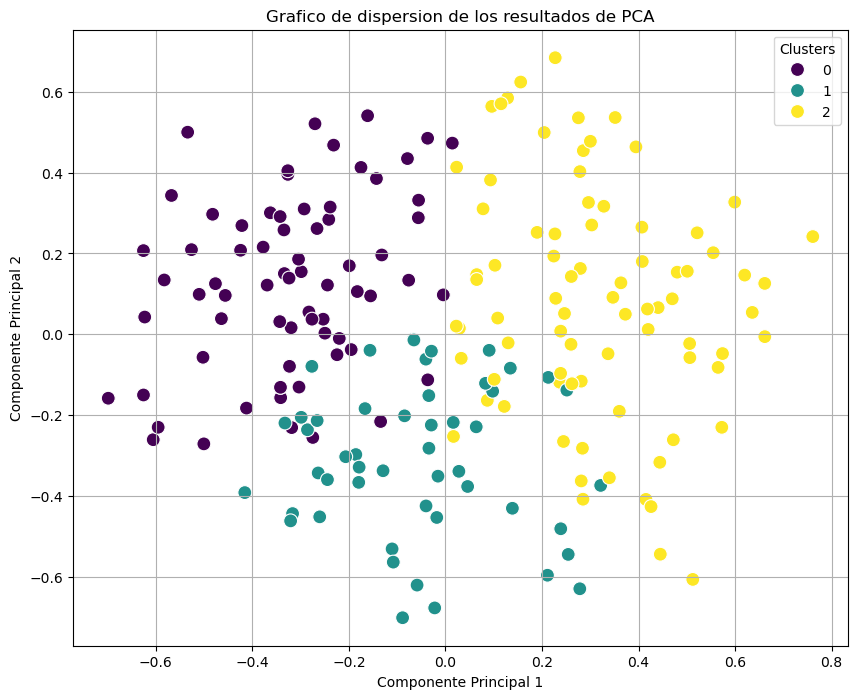

In [48]:
# Crear un grafico de dispersion para los resultados de PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_clusters, palette="viridis", s=100
)
plt.title("Grafico de dispersion de los resultados de PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title='Clusters')
plt.grid(True)

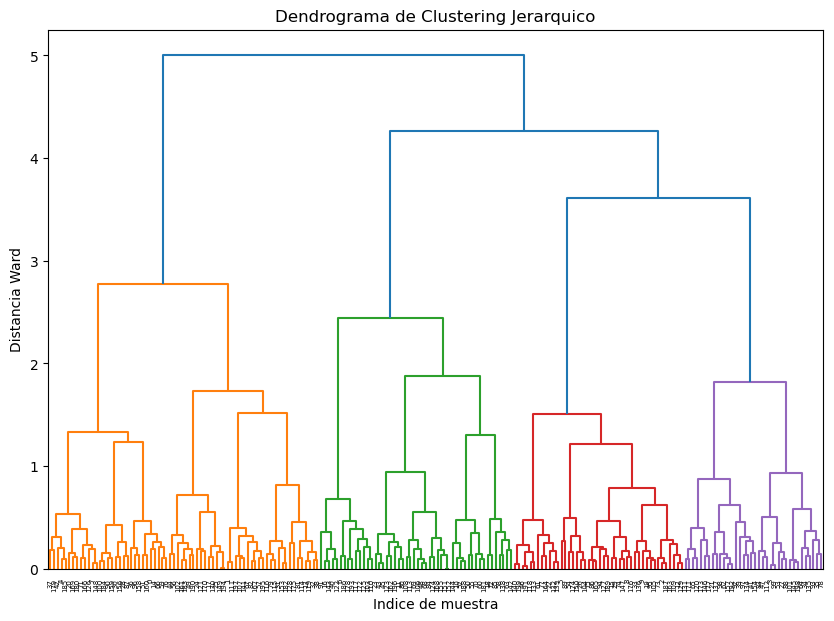

In [25]:
# Crear un dendrograma del clustering jerarquico
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Dendrograma de Clustering Jerarquico")
plt.xlabel("Indice de muestra")
plt.ylabel("Distancia Ward")
plt.axhline(y=10, color="r", linestyle="--")

5.- Interpretacion y Estrategias de Marketing basadas en los Clusters


In [53]:
# Escribe un loop que te permita mostrar los datos basicos de los diferentes clusters, como
# su edad media 
# sus ingresos medios 
# su puntuacion de gastos media 
# Analisis de clusters para determinar estrategias
cluster_info = pd.DataFrame({
    'Cluster': kmeans_clusters,
    'Edad_Media': data['Edad'],
    'Ingresos_Medios': data['Ingresos Anuales (k$)'],
    'Gasto_Medio': data['Puntuación de Gasto (1-100)']
})

for cluster in cluster_info['Cluster'].unique():
    cluster_data = cluster_info[cluster_info['Cluster'] == cluster]
    print(f'Cluster {cluster}:')
    print(f' - Edad Media: {cluster_data['Edad_Media'].mean():.0f}')
    print(f' - Ingresos Medio: {cluster_data['Ingresos_Medios'].mean():.2f}')
    print(f' - Puntuacion de Gasto Media: {cluster_data['Gasto_Medio'].mean():.2f}')
    print()

Cluster 2:
 - Edad Media: 50
 - Ingresos Medio: 97.33
 - Puntuacion de Gasto Media: 62.00

Cluster 0:
 - Edad Media: 43
 - Ingresos Medio: 52.51
 - Puntuacion de Gasto Media: 20.17

Cluster 1:
 - Edad Media: 34
 - Ingresos Medio: 49.08
 - Puntuacion de Gasto Media: 72.20

